### Importing Dependencies

In [1]:
from Bio import pairwise2
from Bio.Seq import Seq
from Bio.pairwise2 import align
from Bio import SeqIO

# List of file paths
file_paths = ["test1.extendedFrags.fastq"]

# List to store all reads from all files
all_reads = []

# Iterate over each file
for file_path in file_paths:
    # Use SeqIO to read the .fsa file
    reads = list(SeqIO.parse(file_path, "fastq"))
    
    # Add the reads to the list of all reads
    all_reads.extend(reads)

# Now all_reads contains reads from all files

C:\Users\tinku\anaconda3\Lib\site-packages\Bio\pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


### sw Alignment Algorithm

In [2]:
from Bio import pairwise2
from Bio.Seq import Seq

def perform_swalignment(seq1, seq2):
    alignments = pairwise2.align.localms(seq1, seq2, 2, -1, -0.5, -0.1)
    
    # Extract the first alignment (assuming you want the best one)
    best_alignment = alignments[0]
    
    # Extract the aligned sequences and score
    aligned_seq1 = best_alignment.seqA
    aligned_seq2 = best_alignment.seqB
    alignment_score = best_alignment.score
    
    return alignment_score, aligned_seq1, aligned_seq2

# Example usage
seq1 = Seq("CGGTTGATGTGATGGGAGGGATCTTATAGA")
seq2 = Seq("GACATCACCTCCCACAACGACGAAAACCTCCCCATTGGCCTGCTTCGTGGCAATGCGCCACC")

alignment_score, aligned_seq1, aligned_seq2 = perform_swalignment(seq1, seq2)

print(f"Alignment Score: {alignment_score}")
print(f"Aligned Sequence 1: {aligned_seq1}")
print(f"Aligned Sequence 2: {aligned_seq2}")

Alignment Score: 29.299999999999997
Aligned Sequence 1: -----------------CG--G------------TTGA---TG-TGAT-G-GG-AGGGAT-CTTATAG--A--
Aligned Sequence 2: GACATCACCTCCCACAACGACGAAAACCTCCCCATTG-GCCTGCT--TCGTGGCA---ATGC-----GCCACC


### Filtering sequences based on the onTargets

In [ ]:
from Bio.Seq import Seq

# Initialize lists to store sequences
Big_Cut_ON = [[] for _ in range(18)]

# Your existing code with minor modifications
l = len(Big_Cut_Seq1)
check_rev = ['GTGGCGCATTGCCACGAAGC',
 'ATCACATCAACCGGTGGCGC',
 'GCTTCGTGGCAATGCGCCAC',
 'TCACATCAACCGGTGGCGCA',
 'CCGGTTGATGTGATGGGAGC',
 'ATTGGCCTGCTTCGTGGCAA',
 'CGAAGCAGGCCAATGGGGAG',
 'ATGGGGAGGACATCGATGTC',
 'CATTGGCCTGCTTCGTGGCA',
 'GTTGATGTGATGGGAGCCCT',
 'CCCCATTGGCCTGCTTCGTG',
 'GAGTCCGAGCAGAAGAAGAA',
 'TTGGCCTGCTTCGTGGCAAT',
 'AGCAGAAGAAGAAGGGCTCC',
 'TCTTCTTCTGCTCGGACTCA',
 'TTCTTCTTCTGCTCGGACTC',
 'TCCTCCTCCAGCTTCTGCCG',
 'TTCCTCCTCCAGCTTCTGCC']

check = ['GCTTCGTGGCAATGCGCCAC',
 'GCGCCACCGGTTGATGTGAT',
 'GTGGCGCATTGCCACGAAGC',
 'TGCGCCACCGGTTGATGTGA',
 'GCTCCCATCACATCAACCGG',
 'TTGCCACGAAGCAGGCCAAT',
 'CTCCCCATTGGCCTGCTTCG',
 'GACATCGATGTCCTCCCCAT',
 'TGCCACGAAGCAGGCCAATG',
 'AGGGCTCCCATCACATCAAC',
 'CACGAAGCAGGCCAATGGGG',
 'TTCTTCTTCTGCTCGGACTC',
 'ATTGCCACGAAGCAGGCCAA',
 'GGAGCCCTTCTTCTTCTGCT',
 'TGAGTCCGAGCAGAAGAAGA',
 'GAGTCCGAGCAGAAGAAGAA',
 'CGGCAGAAGCTGGAGGAGGA',
 'GGCAGAAGCTGGAGGAGGAA']

# Run1
fullcheck = 'GTTTTAGAGCTAGAAATAGCAAGTTAAAATAAGGCTAGTCCGTTATCAACTTGAAAAAGTGGCACCGAGTCGGTGCTTTTTTAAACGAGGCGAGTTTACGGGTTGTTA'

for i in range(18):
    for record in all_reads:
        s1 = str(record.seq)
        s2 = str(Seq(s1).reverse_complement())
        L = len(s1)
        if L >= 150 and L < 250:
            sc, _, _ = perform_swalignment(Seq(s1[:]), Seq(fullcheck))
            print('sc',sc)
            sr, _, _ = perform_swalignment(Seq(s2[:]), Seq(fullcheck))
            if sr >= 100 and sr > sc:
                OF1 = s2.find(check_rev[i]) 
                if OF1 != -1:
                    Big_Cut_ON[i].append(str(Seq(s2).reverse_complement()))
            elif sc >= 100:
                OF1 = s1.find(check[i]) 
                if OF1 != -1:
                    Big_Cut_ON[i].append(s1) 






In [ ]:
# Print the number of elements for each set
for i in range(17):
    print(f"Elements of the input sequences for set {i+1}: {len(Big_Cut_ON[i])}")

### Removing the sequences that are UncUt from the total list for each target

In [ ]:
def find_subsets(string):
    subsets = []
    for i in range(len(string)):
        for j in range(i + 1, len(string) + 1):
            if j - i >= 10:  # Check if the length of the substring is at least 5
                subsets.append(string[i:j])
    return subsets

# Example usage:
subsets = find_subsets('GACATCACCTCCCACAACGA')
subsets1 = find_subsets('TCGTTGTGGGAGGTGATGTC')
# Find elements of the input sequences that are not substrings of specified length for each set
elements_lists = [[] for _ in range(18)]
for i in range(17):
    for seq in Big_Cut_ON[i]:   
        if len(seq) >= 150:
            found = False
            for sub in subsets:
                if sub in seq:
                    found = True
                    break
            if not found:
                elements_lists[i].append(seq)
                
elements_lists1 = [[] for _ in range(18)]
for i in range(17):
    for seq in elements_lists[i]:   
        if len(seq) >= 150:
            found = False
            for sub in subsets1:
                if sub in seq:
                    found = True
                    break
            if not found:
                elements_lists1[i].append(seq)

# Print the number of elements for each set
for i in range(17):
    print(f"Elements of the input sequences for set {i+1}: {len(elements_lists1[i])}")

In [ ]:
for i in range(17):
    # Assuming bigcut_dict is a dictionary containing lists, indexed from 1 to 18
    filename = f"bigcut_list_{i}.txt"
    with open(filename, 'w') as f:
        for item in  elements_lists1[i]:
            f.write("%s\n" % item)

In [ ]:
# Loop through 18 text files
for i in range(17):
    # Open the text file for reading and the corresponding fasta file for writing
    with open(f"bigcut_list_{i}.txt", "r") as fileInput, open(f"bigcut_list_{i}.fsa", "w") as fileOutput:
        # Seq count
        count = 1

        # Loop through each line in the input file
        print(f"Converting bigcut_list_{i}.txt to FASTA...")
        for strLine in fileInput:
            # Strip the endline character from each input line
            strLine = strLine.rstrip("\n")

            # Output the header
            fileOutput.write(">" + str(count) + "\n")
            fileOutput.write(strLine + "\n")

            count += 1
        print(f"Done converting bigcut_list_{i}.txt to FASTA.")


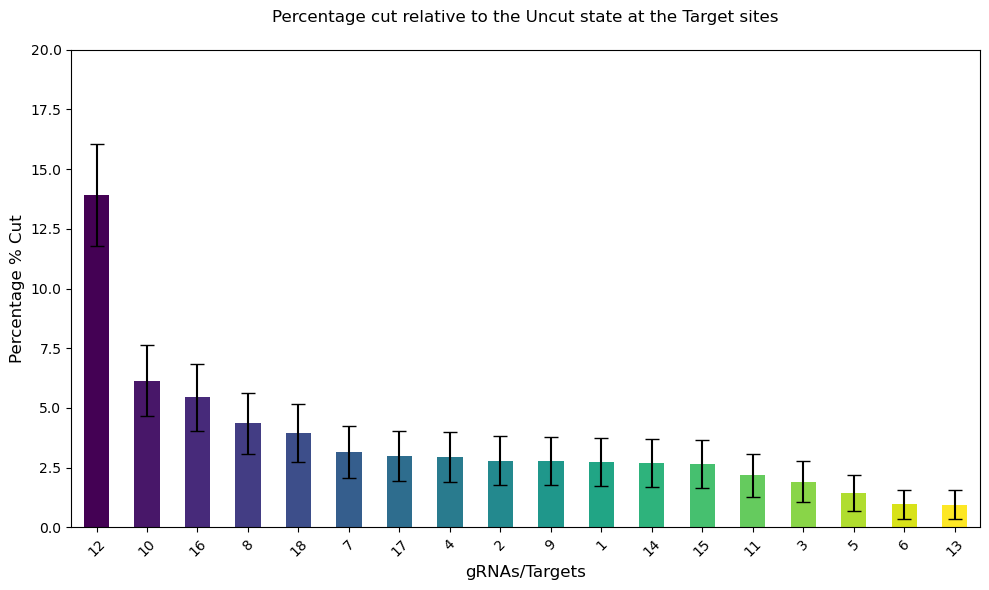

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Read CSV into DataFrame
df = pd.read_csv("C:/Users/tinku/OneDrive/Desktop/Final Semester/Research/Emulsion Chapter/EMX_On_OFF/illumina Data/EMX_Data/Data1/Analysis_All_EMX_1.csv")

# Step 2: Sort DataFrame by the column you're plotting
df_sorted = df.sort_values(by='Percentage', ascending=False)

# Step 3: Calculate percentage of each category
count = df_sorted['Percentage']

# Step 2: Calculate percentage of each category
percentage = df['Percentage'] / 100  # Convert percentage to proportion
n = 1000  # Total trials, assuming 1000 here

# Step 3: Calculate binomial error bars
errors = 1.96 * np.sqrt(percentage * (1 - percentage) / n) * 100  # 95% confidence interval

# Step 4: Define colors for each bar
colors = plt.cm.viridis(np.linspace(0, 1, len(df_sorted)))  # Using colormap to generate colors

# Step 5: Plot the bar graph with different colors
plt.figure(figsize=(10, 6))
count.plot(kind='bar', yerr=errors, color=colors, capsize=5)
plt.title('Percentage cut relative to the Uncut state at the Target sites', pad=20, fontsize='large')
plt.xlabel('gRNAs/Targets', fontsize='large')
plt.ylabel('Percentage % Cut', fontsize='large')
plt.xticks(rotation=45)

# Set y-limit from 0 to 15
plt.ylim(0, 20)

# Set x-labels as the values from the 'Sequence' column
plt.gca().set_xticklabels(df_sorted['Sequence'])

plt.tight_layout()

# Save the plot as an SVG image
plt.savefig('Figure3-Ontarget_graph.svg', format='svg', transparent=True)
plt.show()


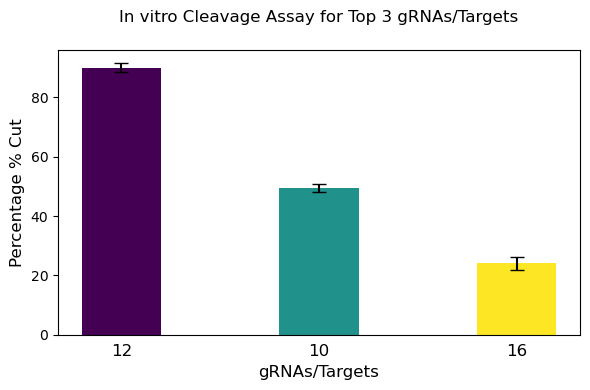

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the CSV file
df = pd.read_csv("In_vitro_On_target.csv")

# Calculate mean and standard deviation for each guide
grouped_data = df.groupby('Sequence')['% Cut'].agg(['mean', 'std'])

# Extract mean and standard deviation
mean_percentage_cut = grouped_data['mean']
std_percentage_cut = grouped_data['std']

# Sort guides by mean percentage cut
sorted_guides = mean_percentage_cut.sort_values(ascending=False).index

# Define colors for each group based on the order of appearance
num_groups = len(sorted_guides)
colors = plt.cm.viridis(np.linspace(0, 1, num_groups))
color_dict = {guide: color for guide, color in zip(sorted_guides, colors)}

# Create bar plot with error bars
plt.figure(figsize=(6, 4))
for i, guide in enumerate(sorted_guides):
    plt.bar(i, mean_percentage_cut[guide], yerr=std_percentage_cut[guide], capsize=5, color=color_dict[guide], width=0.4)  # Adjust the width parameter

# Manually set x-labels
plt.xticks(range(len(sorted_guides)), sorted_guides, rotation=0, ha='center', fontsize=12)  # Set rotation to 0

# Remove x-ticks
plt.tick_params(axis='x', which='both', bottom=False, top=False)

plt.xlabel('gRNAs/Targets', fontsize=12)
plt.ylabel('Percentage % Cut', fontsize=12)
plt.title('In vitro Cleavage Assay for Top 3 gRNAs/Targets', fontsize=12, pad=20)
plt.tight_layout()

# Save the plot as an SVG image
plt.savefig('Figure3-Ontarget_graph_in_vitro_validation.svg', format='svg', transparent=True)

# Show the plot
plt.show()
